# Imports

In [16]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.datasets as dt
import sklearn.model_selection as ms
import sklearn.metrics as mt
import matplotlib.pyplot as plt

# Loading

In [36]:
X, y = dt.make_classification(n_samples=1000,
                              n_features=6,
                              n_classes=2,
                              n_redundant=3,
                              random_state=0)

X_train, X_test, y_train, y_test = ms.train_test_split(X, y)

# Training

In [47]:
# define
rfc_model = RandomForestClassifier(n_estimators=3,
                                   max_depth=2,
                                   random_state=0)
# fit 
rfc_model.fit(X_train, y_train)
# predict
y_pred = rfc_model.predict_proba(X_test)[:, 1]

# ROC

In [48]:
fpr, tpr, th = mt.roc_curve(y_test, y_pred)

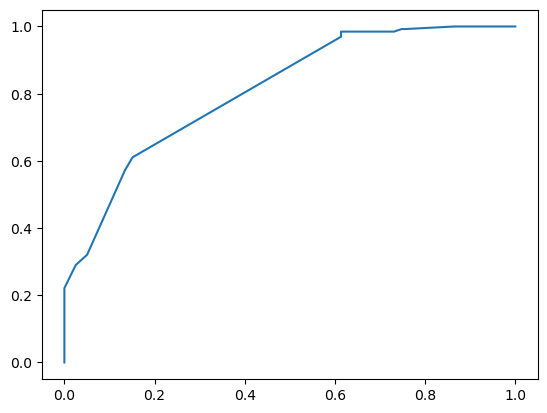

In [50]:
plt.plot(fpr, tpr);

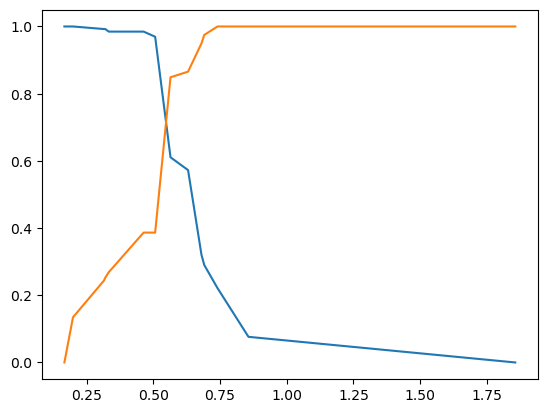

In [64]:
plt.plot(th, tpr)
plt.plot(th, 1-fpr)

In [67]:
distances = np.abs(tpr - (1-fpr))

In [72]:
best_th = th[np.argmin(distances)]

In [76]:
y_final_pred = (y_pred >= best_th).astype('int64')


In [77]:
y_final_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1])

In [83]:
import pandas as pd

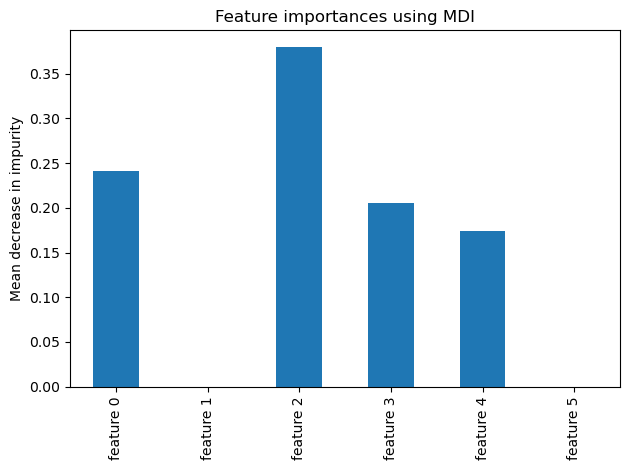

In [103]:
feature_names = [f'feature {i}' for i in range(X.shape[1])]
importances_values = rfc_model.feature_importances_

importances = pd.Series(importances_values, index=feature_names)

fig, ax = plt.subplots()
importances.plot.bar(ax=ax)
ax.set_title('Feature importances using MDI')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()